Сделайте summary нижеуказанного текста, используя библиотеки для NLP: nltk и SpaCy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the dataset
# file_path = 'internet_service_churn.csv'
file_path = "../datasets/processed_dataset.csv"
data = pd.read_csv(file_path)

data.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
0,1,0,11.95,25,0.14,8.4,2.3,0
1,0,0,8.22,0,0.00,0.0,0.0,1
2,1,0,8.91,16,0.00,13.7,0.9,1
3,0,0,6.87,21,0.00,0.0,0.0,1
4,0,0,6.39,0,0.00,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71882 entries, 0 to 71881
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71882 non-null  int64  
 1   is_movie_package_subscriber  71882 non-null  int64  
 2   subscription_age             71882 non-null  float64
 3   bill_avg                     71882 non-null  int64  
 4   reamining_contract           71882 non-null  float64
 5   download_avg                 71882 non-null  float64
 6   upload_avg                   71882 non-null  float64
 7   churn                        71882 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 4.4 MB


In [4]:
data.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,download_avg,upload_avg,churn
count,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000,71882.000000
mean,0.815308,0.334103,2.455431,18.960964,0.497667,43.492609,4.174503,0.557163
std,0.388050,0.471679,2.026719,12.383929,0.665780,58.734734,9.693839,0.496725
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.940000,13.000000,0.000000,6.700000,0.500000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.000000,27.800000,2.100000,1.000000
75%,1.000000,1.000000,3.300000,22.000000,1.030000,60.400000,4.800000,1.000000
max,1.000000,1.000000,12.800000,285.000000,2.920000,3179.800000,453.300000,1.000000


Аналіз Даних (EDA)

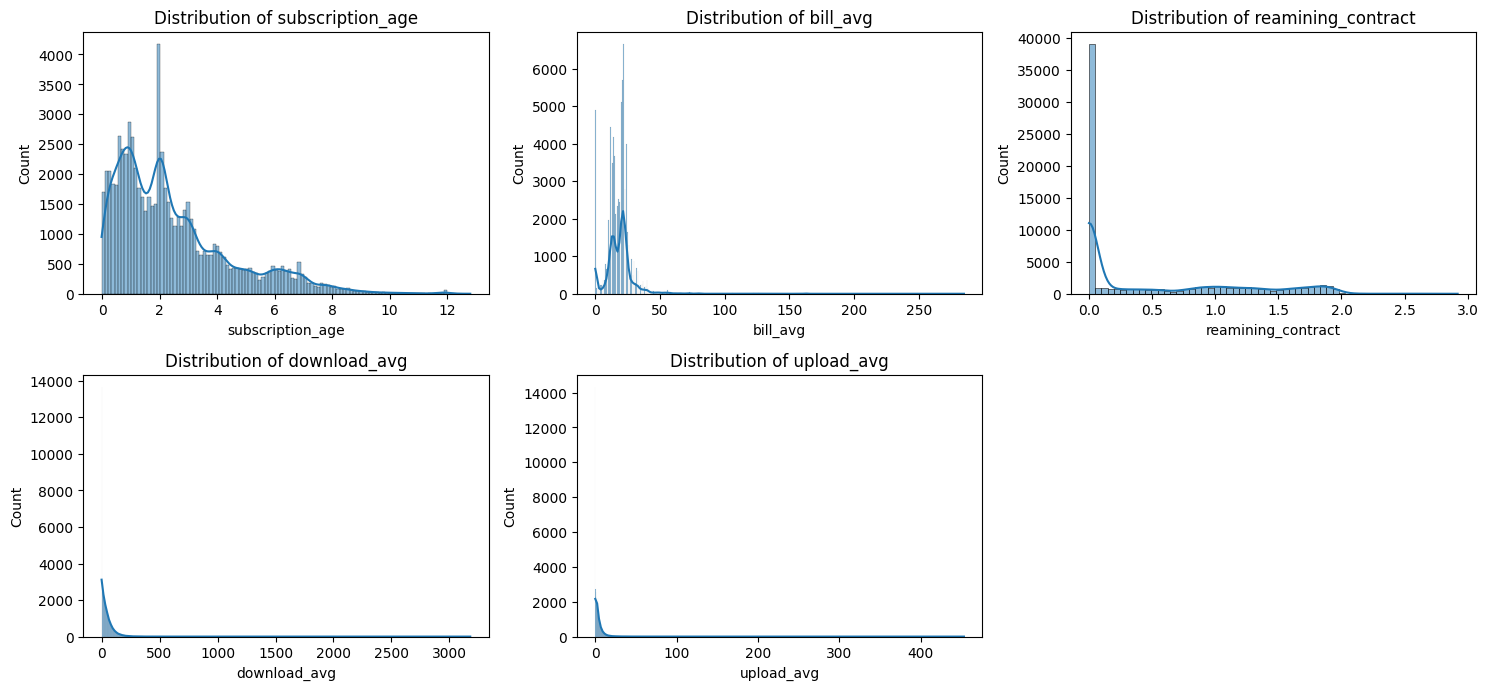

In [5]:
# Вивчення розподілу числових змінних
# numerical_columns = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count',
#                      'download_avg', 'upload_avg', 'download_over_limit']

numerical_columns = ['subscription_age', 'bill_avg', 'reamining_contract', 
                     'download_avg', 'upload_avg', ]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [6]:
# Перевірка кількості відсутніх значень у кожній колонці
missing_values = data.isnull().sum()
print(missing_values)

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
download_avg                   0
upload_avg                     0
churn                          0
dtype: int64


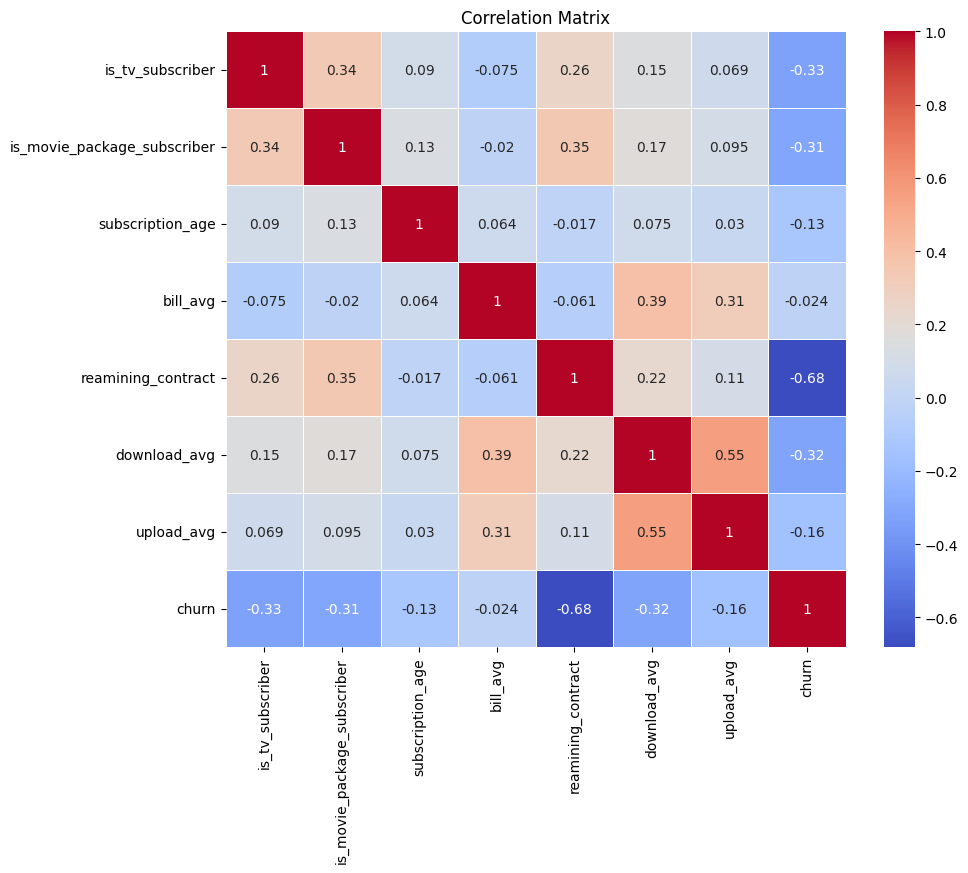

In [7]:
# Кореляційна матриця для числових ознак
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

4. Попередня Обробка Даних

In [8]:
# Обробка відсутніх значень
# Заповнимо відсутні значення медіаною для числових стовпців
data['reamining_contract'].fillna(data['reamining_contract'].median())
data['download_avg'].fillna(data['download_avg'].median())
data['upload_avg'].fillna(data['upload_avg'].median())

0        2.3
1        0.0
2        0.9
3        0.0
4        0.0
        ... 
71877    0.0
71878    0.0
71879    0.2
71880    0.0
71881    0.0
Name: upload_avg, Length: 71882, dtype: float64

In [9]:
# 2. Розділення на ознаки та ціль
# X = data.drop(['id', 'churn'], axis=1)

X = data.drop(['churn'], axis=1)
y = data['churn']

In [10]:
# 3. Масштабування числових ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# 4. Поділ на тренувальні і тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


5. Розробка Моделі

In [12]:
# 5. Навчання моделі SVM
model = SVC(kernel='rbf', C=1.0)
model.fit(X_train, y_train)

SVC()

In [13]:
# 6. Прогнозування
y_pred = model.predict(X_test)

In [14]:
# 7. Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy

0.9138206858176253

In [16]:
precision

0.9183095120749137

In [17]:
recall

0.9282600572923153

In [18]:
f1

0.9232579746051409

Інтеграція та Виведення Результатів

In [15]:
def predict_churn(new_client_data, model, scaler):
    """
    Прогнозування відтоку клієнта на основі нових даних.

    :param new_client_data: Словник із новими даними клієнта.
    :param model: Навчена модель SVM.
    :param scaler: Масштабувальник для нормалізації даних.
    :return: Результат прогнозу (Ймовірність відтоку: Висока/Низька).
    """
    # Перетворюємо словник у DataFrame
    new_client_df = pd.DataFrame([new_client_data])

    # Масштабування даних
    new_client_scaled = scaler.transform(new_client_df)

    # Прогноз
    prediction = model.predict(new_client_scaled)

    # Виведення результату
    if prediction == 1:
        return "Клієнт має високу ймовірність відтоку."
    else:
        return "Клієнт має низьку ймовірність відтоку."

In [16]:
new_client = {
    'is_tv_subscriber': 1,
    'is_movie_package_subscriber': 0,
    'subscription_age': 2,
    'bill_avg': 100.5,
    'reamining_contract': 0.5,
    # 'service_failure_count': 2,
    'download_avg': 50,
    'upload_avg': 20,
    # 'download_over_limit': 5
}

# Викликаємо функцію для прогнозування відтоку
result = predict_churn(new_client, model, scaler)
print(result)

Клієнт має високу ймовірність відтоку.


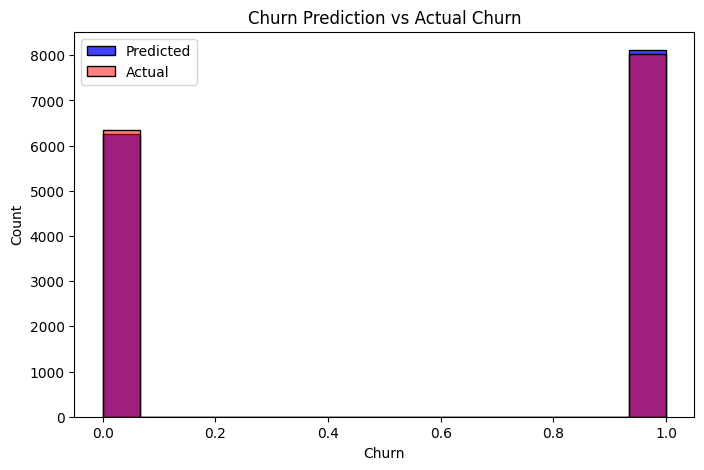

In [17]:
def visualize_churn_proba(model, X_test, y_test):
    """
    Візуалізація прогнозів моделі щодо відтоку клієнтів.

    :param model: Навчена модель SVM.
    :param X_test: Тестові дані.
    :param y_test: Реальні значення цільової змінної.
    """
    predictions = model.predict(X_test)

    # Візуалізація справжніх і передбачених значень
    plt.figure(figsize=(8, 5))
    sns.histplot(predictions, kde=False, color="blue", label='Predicted')
    sns.histplot(y_test, kde=False, color="red", label='Actual', alpha=0.5)
    plt.legend()
    plt.title('Churn Prediction vs Actual Churn')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.show()

# Викликаємо функцію для візуалізації результатів
visualize_churn_proba(model, X_test, y_test)

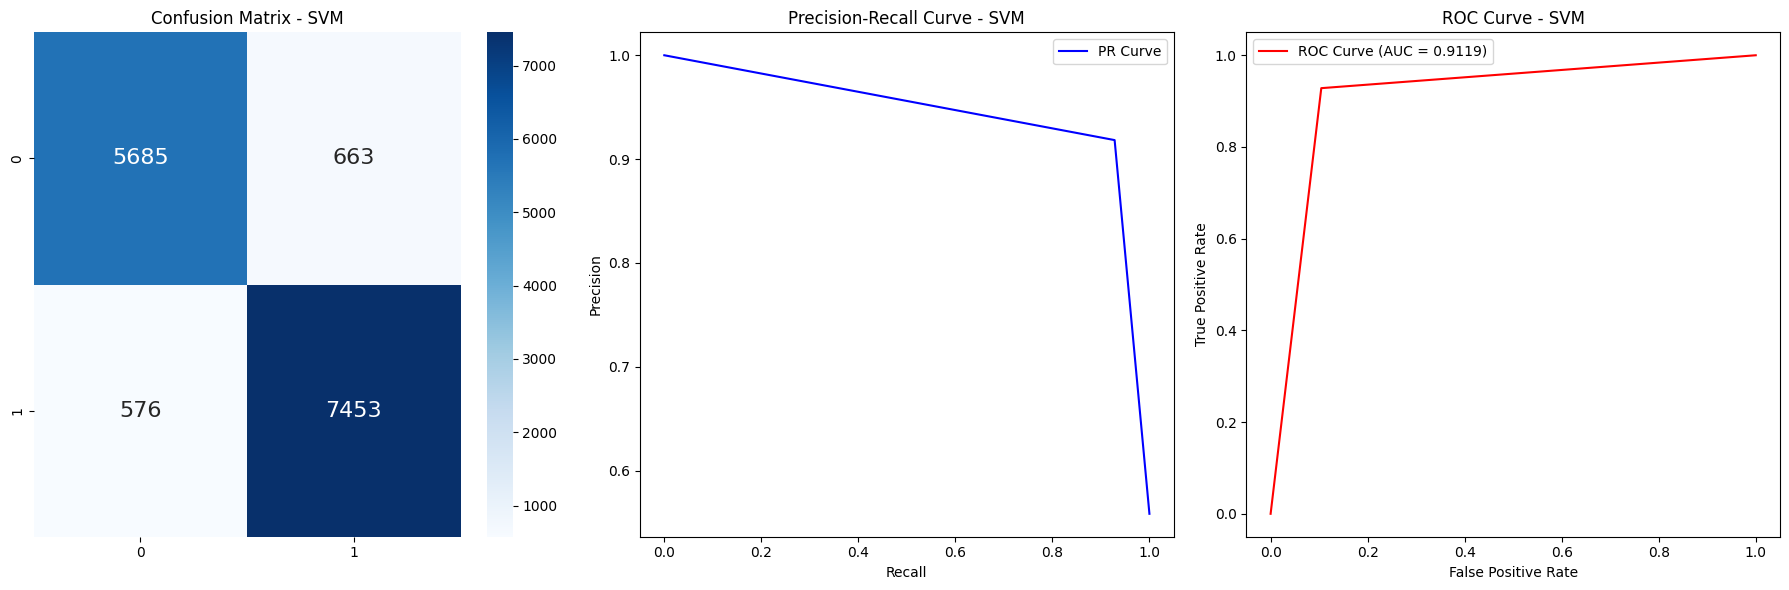

Точність моделі з найкращими параметрами: 0.9138206858176253


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6348
           1       0.92      0.93      0.92      8029

    accuracy                           0.91     14377
   macro avg       0.91      0.91      0.91     14377
weighted avg       0.91      0.91      0.91     14377



In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Оцінка точності моделі з найкращими параметрами
best_model = model
name = "SVM"
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(18, 6))
# Матриця плутанини
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.title(f'Confusion Matrix - {name}')

# PR-крива
plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='b', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {name}')
plt.legend()

# ROC-крива
plt.subplot(1, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='r', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {name}')
plt.legend()

plt.tight_layout()
plt.show()

# Вивід найкращих знайдених гіперпараметрів
# print("\nНайкращі параметри:", gridsearch.best_params_, "\n\n")

# Точність найкращої моделі
print(f"Точність моделі з найкращими параметрами: {accuracy}\n\n")

print(classification_report(y_test, y_pred))

In [19]:
MODELS_PATH = '../models'

In [21]:
import joblib

joblib.dump(model, f"{MODELS_PATH}/svm_model.pkl")

['../models/svm_model.pkl']

In [22]:
dir(model)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_interce

In [25]:
model.coef_

AttributeError: coef_ is only available when using a linear kernel